In [5]:
import numpy as np
import pandas as   pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

####  Подготовка данных

Загрузите данные с помощью `pandas`.

In [6]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [7]:
rnd_data = data.sample(frac=1, random_state=42)
train_data = rnd_data.iloc[:int(len(rnd_data) * 0.7)]
test_data = rnd_data.iloc[int(len(rnd_data) * 0.3):]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [8]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [9]:
train_features, target  = get_features_and_target(train_data)
train_features, target

(             Pclass     Sex   Age  SibSp  Parch     Fare
 PassengerId                                             
 710               3    male   NaN      1      1  15.2458
 440               2    male  31.0      0      0  10.5000
 841               3    male  20.0      0      0   7.9250
 721               2  female   6.0      0      1  33.0000
 40                3  female  14.0      1      0  11.2417
 ...             ...     ...   ...    ...    ...      ...
 254               3    male  30.0      1      0  16.1000
 304               2  female   NaN      0      0  12.3500
 668               3    male   NaN      0      0   7.7750
 572               1  female  53.0      2      0  51.4792
 637               3    male  32.0      0      0   7.9250
 
 [623 rows x 6 columns],
 PassengerId
 710    1
 440    0
 841    0
 721    1
 40     1
       ..
 254    0
 304    1
 668    0
 572    1
 637    0
 Name: Survived, Length: 623, dtype: int64)

In [10]:
test_features, target = get_features_and_target(test_data)
test_features, target

(             Pclass     Sex   Age  SibSp  Parch      Fare
 PassengerId                                              
 431               1    male  28.0      0      0   26.5500
 446               1    male   4.0      0      2   81.8583
 651               3    male   NaN      0      0    7.8958
 173               3  female   1.0      1      1   11.1333
 451               2    male  36.0      1      2   27.7500
 ...             ...     ...   ...    ...    ...       ...
 107               3  female  21.0      0      0    7.6500
 271               1    male   NaN      0      0   31.0000
 861               3    male  41.0      2      0   14.1083
 436               1  female  14.0      1      2  120.0000
 103               1    male  21.0      0      1   77.2875
 
 [624 rows x 6 columns],
 PassengerId
 431    1
 446    1
 651    0
 173    1
 451    0
       ..
 107    1
 271    0
 861    0
 436    1
 103    0
 Name: Survived, Length: 624, dtype: int64)

#### Исследование

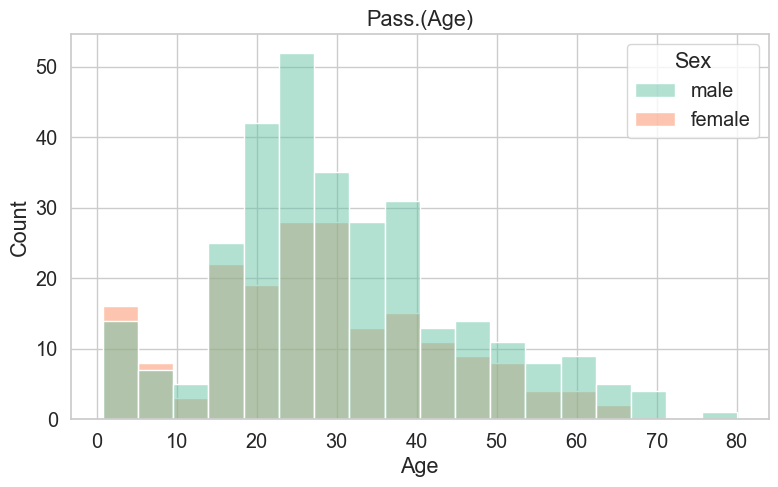

In [11]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9,5))
    ax = sns.histplot(data=train_data, x='Age', hue='Sex')
    ax.set(xlabel='Age', 
          ylabel='Count',
          title='Pass.(Age)')

In [12]:
count_fem = len(train_data[train_data['Sex'] == 'female'])
count_male = len(train_data[train_data['Sex'] == 'male'])

count_fem_surv = len(train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)])
count_male_surv = len(train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)])
print('Доля выживших женщин', count_fem_surv/count_fem)
print('Доля выживших мужчин', count_male_surv/ count_male )

Доля выживших женщин 0.7466666666666667
Доля выживших мужчин 0.19095477386934673


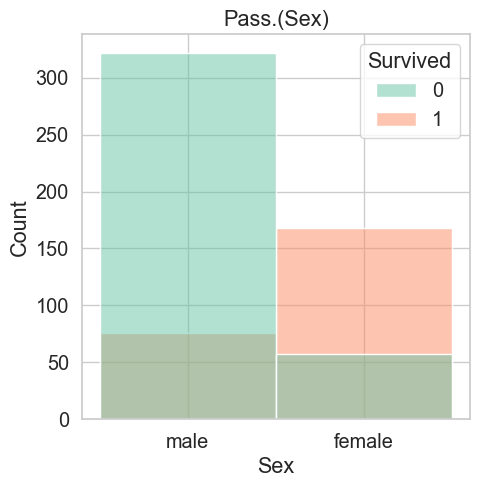

In [13]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5,5))
    ax = sns.histplot(data=train_data, x='Sex', hue='Survived')
    ax.set(xlabel='Sex', 
          ylabel='Count',
          title='Pass.(Sex)')

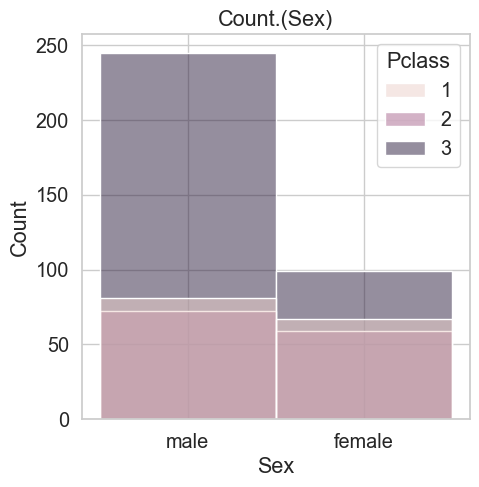

In [14]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5,5))
    ax = sns.histplot(data=train_data, x='Sex', hue='Pclass')
    ax.set(xlabel='Sex', 
          ylabel='Count',
          title='Count.(Sex)')

In [15]:
pd.crosstab(train_data['Sex'], train_data['Pclass'], margins=True)

Pclass,1,2,3,All
Sex,,,,
female,67,59,99,225
male,81,72,245,398
All,148,131,344,623


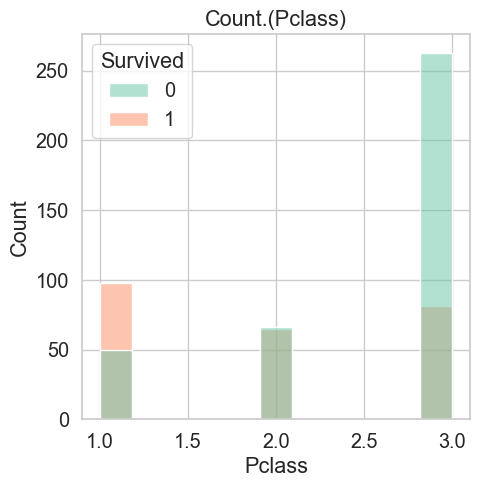

In [16]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5,5))
    ax = sns.histplot(data=train_data, x='Pclass', hue='Survived')
    ax.set(xlabel='Pclass', 
          ylabel='Count',
          title='Count.(Pclass)')

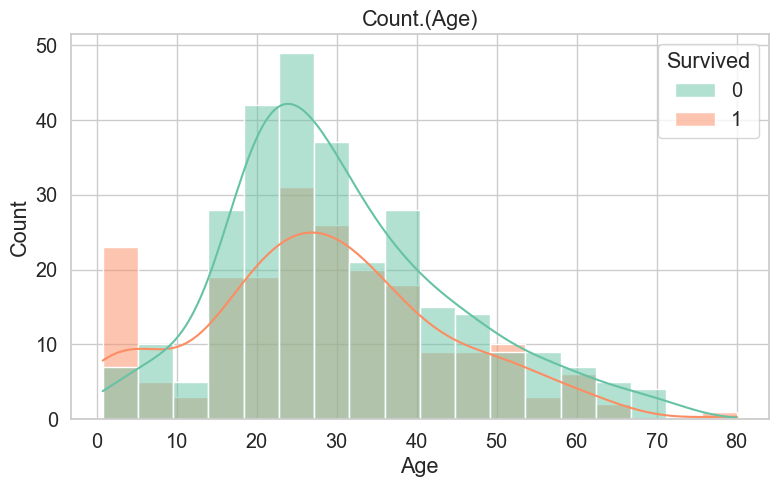

In [17]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9,5))
    ax = sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
    ax.set(xlabel='Age', 
          ylabel='Count',
          title='Count.(Age)')

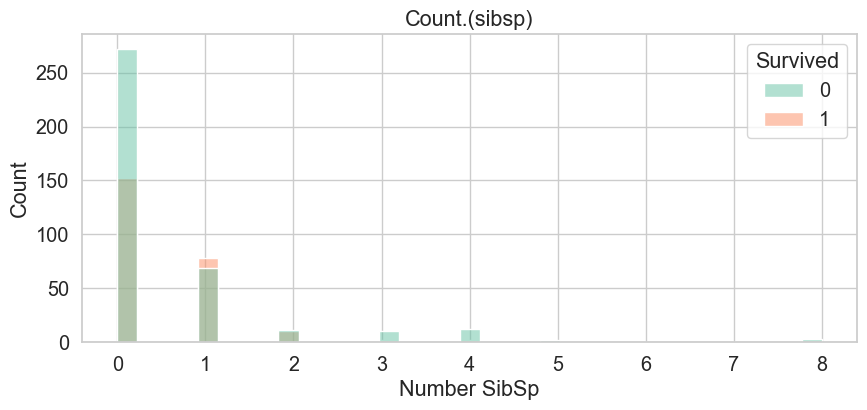

In [18]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10,4))
    ax = sns.histplot(data=train_data, x='SibSp', hue='Survived')
    ax.set(xlabel='Number SibSp', 
          ylabel='Count',
          title='Count.(sibsp)')

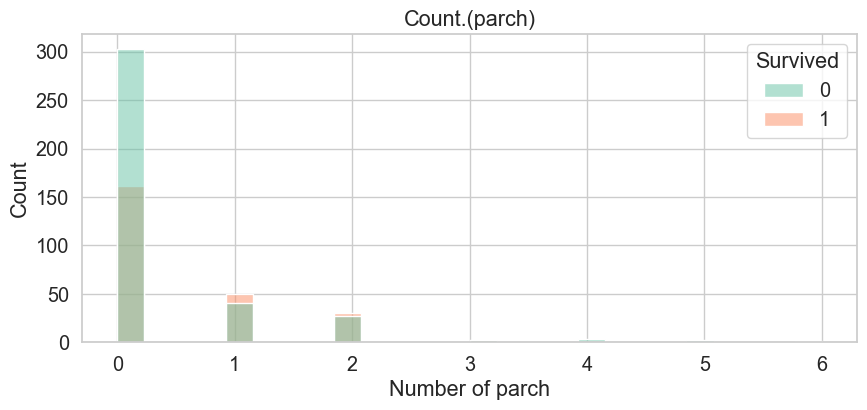

In [19]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10,4))
    ax = sns.histplot(data=train_data, x='Parch', hue='Survived')
    ax.set(xlabel='Number of parch', 
          ylabel='Count',
          title='Count.(parch)')

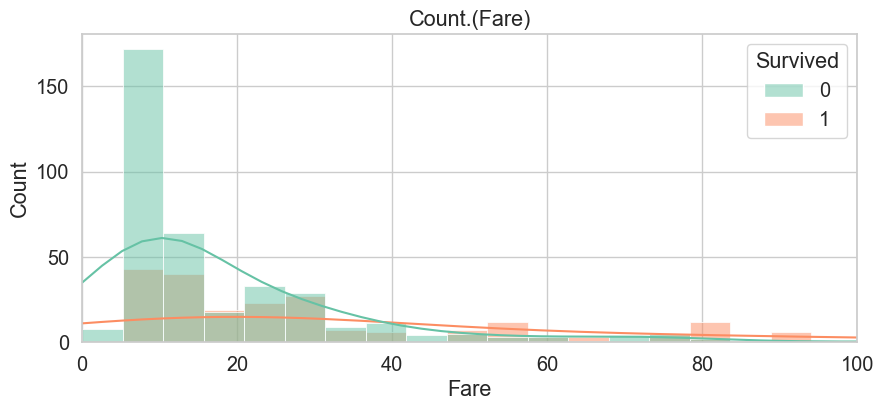

In [20]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10,4))
    ax = sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
    plt.xlim((0, 100))
    ax.set(xlabel='Fare', 
          ylabel='Count',
          title='Count.(Fare)')

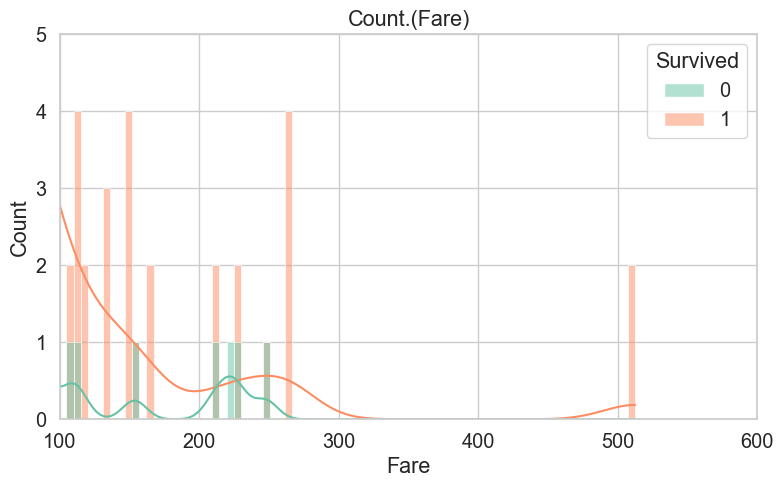

In [21]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9,5))
    ax = sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
    plt.xlim((100, 600))
    plt.ylim((0, 5))
    ax.set(xlabel='Fare', 
          ylabel='Count',
          title='Count.(Fare)')

#### Knn

In [22]:
def matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return np.sum(A[:, :, np.newaxis] * B[np.newaxis, :, :], axis=1)

In [30]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    A_square = np.sum(A ** 2, axis=1).reshape(-1, 1)
    B_square = np.sum(B ** 2, axis=1).reshape(-1, 1)
    AB = matrix_multiplication(B, A.T)
    dist_matrix = np.sqrt(B_square - 2 * AB + A_square.T)
    return np.argsort(dist_matrix, axis=1)[:, :k]

In [31]:
from sklearn. preprocessing import normalize
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [32]:
def knn(features, train_features, train_target, k=1):
    nearest_index = find_nearest_points(normalize(train_features[train_target].values, axis= 1 , norm='l1'), normalize(features[train_target].values, axis= 1 , norm='l1') ,k)
    predict = []
    for elem in nearest_index:
        predict.append(round(np.mean(train_features['Survived'].iloc[elem]),4))
    return pd.Series(predict)

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? 

In [33]:
knn2 = knn(features=test_data, train_features=train_data, train_target=['Age', 'Fare'], k=1).values
knn3 = knn(features=test_data, train_features=train_data, train_target=['Age', 'Fare'], k=3).values
knn5 = knn(features=test_data, train_features=train_data, train_target=['Age', 'Fare'], k=5).values

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [34]:
print(sum((test_data['Survived'].values - knn2) ** 2))
print(sum((test_data['Survived'].values - knn3) ** 2))
print(sum((test_data['Survived'].values - knn5)**2))

188.0
144.8928449100003
128.47999999999976


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

...

Строить классификатор с другими признаками при этом не нужно.

####  Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

...

**Дерево 2:**

...

Реализуйте полученные деревья по шаблону



P.S. Деревья могут получиться у каждого разные, советую самому выолпнить эту часть.

In [ ]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    
    ...
    return predicted

####  Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [35]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    accuracy = (target == predicted).mean()
    return accuracy

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

(0.0, 10.0)

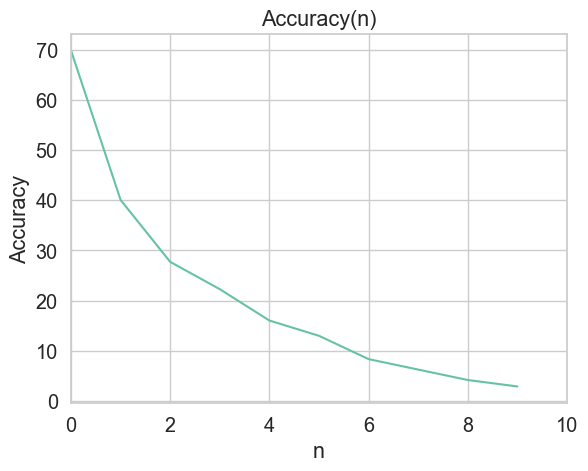

In [36]:
knn_list = [knn(features=test_data, train_features=train_data, train_target=['Age', 'Fare'], k=i).values for i in range(1, 11)]
y = [criteria(pd.Series(test_data['Survived']), knn_list[i]) * 100 for i in range(10)]
ax = sns.lineplot(data=y)
ax.set (xlabel='n',
ylabel='Accuracy',
title='Accuracy(n)')
plt.xlim(0, 10)
